In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import json

import sys
import os
sys.path.append(os.path.abspath('../src/'))
from data_process_func import parce_mess, \
                              parce_side, \
                              parce_date, \
                              parce_time, \
                              parce_pick, \
                              parce_drop, \
                              parce_pax

#matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'serif',
    'sans-serif' : 'Georgia'}
        #'weight' : 'bold'}
# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
# plt.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (16,8)

S = 15
M = 18
B = 28

lw =5

plt.rc('font', size      = S)          # controls default text sizes
plt.rc('axes', titlesize = B)     # fontsize of the axes title
plt.rc('axes', labelsize = M)    # fontsize of the x and y labels
plt.rc('xtick', labelsize= S)    # fontsize of the tick labels
plt.rc('ytick', labelsize= S)    # fontsize of the tick labels
plt.rc('legend', fontsize= M)    # legend fontsize
plt.rc('figure', titlesize=B)  # fontsize of the figure title

# linewidth

L = 6

# Colors

C1 = '#144974' #(20,73,116)
C2 = '#0070C0'
C3 = '#A0A0A0'

dash = '--'

# legend locations
ul = 'upper left'
ur = 'upper right'

# plot layout

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

# grid

plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data_pd = pd.read_csv('../data/SGHitch_msg.csv')

In [4]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66819 entries, 0 to 66818
Data columns (total 11 columns):
date               66819 non-null object
mess_id            66819 non-null int64
user_id            66819 non-null int64
username           49505 non-null object
bot                66819 non-null bool
deleted            66819 non-null bool
action             5931 non-null object
act_entr           5919 non-null object
message            60816 non-null object
reply_to_msg_id    1250 non-null float64
mentioned          66819 non-null bool
dtypes: bool(3), float64(1), int64(2), object(5)
memory usage: 4.3+ MB


In [5]:
data_pd.head()

,date,mess_id,user_id,username,bot,deleted,action,act_entr,message,reply_to_msg_id,mentioned
0,2019-02-25 17:32:20+00:00,1,587793322,jyjyjyjyjyjyjyjy,False,False,MessageActionChannelMigrateFrom,"[{'ChatForbidden': {'title': 'SG Hitch', 'id':...",NaN,NaN,False
1,2019-10-12 16:00:55+00:00,463142,360992588,cssksskyy,False,False,NaN,NaN,👋 Hitcher looking for Driver\n\nPick Up: Bugis...,NaN,False
2,2019-10-12 16:01:02+00:00,463143,40672545,jacindakyt,False,False,NaN,NaN,👋🏼Hitcher looking for drivers.\n\nPick up: MBS...,NaN,False
3,2019-10-12 16:01:09+00:00,463145,152253888,NaN,False,False,NaN,NaN,🚗 Driver looking for hitcher \nPick up : CCK\n...,NaN,False
4,2019-10-12 16:01:14+00:00,463146,47916066,SiangFong,False,False,NaN,NaN,👋 Hitcher looking for Driver\nPick up: Bar ro...,NaN,False


In [6]:
data_pd.tail()

,date,mess_id,user_id,username,bot,deleted,action,act_entr,message,reply_to_msg_id,mentioned
66814,2019-11-07 06:34:15+00:00,543991,810427926,NaN,False,False,NaN,NaN,Hi,NaN,False
66815,2019-11-07 06:34:23+00:00,543992,810427926,NaN,False,False,NaN,NaN,Hitcher,NaN,False
66816,2019-11-07 06:34:57+00:00,543994,810427926,NaN,False,False,NaN,NaN,Hitcher looking for driver’s,NaN,False
66817,2019-11-07 06:35:05+00:00,543995,484109572,thattalldouche,False,False,NaN,NaN,👋 Hitcher looking for Driver\nPick Up: punggol...,NaN,False
66818,2019-11-07 06:35:28+00:00,543996,980326891,bthk14108,False,False,NaN,NaN,👋 driver looking for hitcher\nPick Up:skypark ...,NaN,False


In [7]:
#Bukit Timah'

In [8]:
# Drop action messages (X joined, X left, etc.), empty messages and messages from bots
act_mess_df = data_pd[(data_pd['action'].isnull()) & (data_pd['message'].notnull()) & (data_pd['bot'] != True)]

In [9]:
# Drop colums which are not being used
# act_mess_df.drop(['bot','deleted','action'])

In [10]:
act_mess_df.head()

,date,mess_id,user_id,username,bot,deleted,action,act_entr,message,reply_to_msg_id,mentioned
1,2019-10-12 16:00:55+00:00,463142,360992588,cssksskyy,False,False,NaN,NaN,👋 Hitcher looking for Driver\n\nPick Up: Bugis...,NaN,False
2,2019-10-12 16:01:02+00:00,463143,40672545,jacindakyt,False,False,NaN,NaN,👋🏼Hitcher looking for drivers.\n\nPick up: MBS...,NaN,False
3,2019-10-12 16:01:09+00:00,463145,152253888,NaN,False,False,NaN,NaN,🚗 Driver looking for hitcher \nPick up : CCK\n...,NaN,False
4,2019-10-12 16:01:14+00:00,463146,47916066,SiangFong,False,False,NaN,NaN,👋 Hitcher looking for Driver\nPick up: Bar ro...,NaN,False
5,2019-10-12 16:01:41+00:00,463148,38032084,etheltasha,False,False,NaN,NaN,👋🏻 Hitcher looking for driver\nPick up: cq\nDr...,NaN,False


In [11]:
act_mess_df.tail()

,date,mess_id,user_id,username,bot,deleted,action,act_entr,message,reply_to_msg_id,mentioned
66814,2019-11-07 06:34:15+00:00,543991,810427926,NaN,False,False,NaN,NaN,Hi,NaN,False
66815,2019-11-07 06:34:23+00:00,543992,810427926,NaN,False,False,NaN,NaN,Hitcher,NaN,False
66816,2019-11-07 06:34:57+00:00,543994,810427926,NaN,False,False,NaN,NaN,Hitcher looking for driver’s,NaN,False
66817,2019-11-07 06:35:05+00:00,543995,484109572,thattalldouche,False,False,NaN,NaN,👋 Hitcher looking for Driver\nPick Up: punggol...,NaN,False
66818,2019-11-07 06:35:28+00:00,543996,980326891,bthk14108,False,False,NaN,NaN,👋 driver looking for hitcher\nPick Up:skypark ...,NaN,False


In [12]:
%time act_mess_df = act_mess_df.apply(parce_mess, axis =1)

CPU times: user 4min 50s, sys: 2.07 s, total: 4min 52s
Wall time: 4min 52s


In [13]:
# act_mess_df['pick'][act_mess_df['fl']==0].value_counts()

### Creating `to_dist`

In [14]:
# map = json.load(open('../src/distr_postal.json'))
# to_distr = {}
# for key, val in map.items():
#     for w in val:
#         to_distr[w.lower()] = int(key)
# json.dump(to_distr,open('../src/postal_to_dist.json',"w"))

---------------------------------------------------------------

In [15]:
# to_distr

In [16]:
to_distr = json.load(open('../src/to_dist.json'))
post_to_distr = json.load(open('../src/postal_to_dist.json'))
post_to_distr ,to_distr

({'01': 1,
  '02': 1,
  '03': 1,
  '04': 1,
  '05': 1,
  '06': 1,
  '07': 2,
  '08': 2,
  '14': 3,
  '15': 3,
  '16': 3,
  '09': 4,
  '10': 4,
  '11': 5,
  '12': 5,
  '13': 5,
  '17': 6,
  '18': 7,
  '19': 7,
  '20': 8,
  '21': 8,
  '22': 9,
  '23': 9,
  '24': 10,
  '25': 10,
  '26': 10,
  '27': 10,
  '28': 11,
  '29': 11,
  '30': 11,
  '31': 12,
  '32': 12,
  '33': 12,
  '34': 13,
  '35': 13,
  '36': 13,
  '37': 13,
  '38': 14,
  '39': 14,
  '40': 14,
  '41': 14,
  '42': 15,
  '43': 15,
  '44': 15,
  '45': 15,
  '46': 16,
  '47': 16,
  '48': 16,
  '49': 17,
  '50': 17,
  '81': 17,
  '51': 18,
  '52': 18,
  '53': 19,
  '54': 19,
  '55': 19,
  '82': 19,
  '56': 20,
  '57': 20,
  '58': 21,
  '59': 21,
  '60': 22,
  '61': 22,
  '62': 22,
  '63': 22,
  '64': 22,
  '65': 23,
  '66': 23,
  '67': 23,
  '68': 23,
  '69': 24,
  '70': 24,
  '71': 24,
  '72': 25,
  '73': 25,
  '77': 26,
  '78': 26,
  '75': 27,
  '76': 27,
  '79': 28,
  '80': 28},
 {'boat quay': 1,
  'chinatown': 2,
  'havelock ro

In [17]:
import re

postal = re.compile('(\d\d)\d\d\d\d')

def ind(string):
    string = str(string)
    if not postal.search(string) is None:
        return post_to_distr[postal.search(string).group(1)[:2]]

def pick_distr(string):
    string = str(string)
    
    # First checking for index
    if not postal.search(string) is None:
        return post_to_distr[postal.search(string).group(1)[:2]]
    
    try:
        return to_distr[string]
    except KeyError:
        for key in to_distr.keys():
            if string.find(key)>-1:
                return to_distr[key]
        return np.nan

In [18]:
num = 'sdfgdfg (822345)asdasd'
pick_distr(num)

19

In [19]:
act_mess_df['dist'] = act_mess_df['pick'].apply(pick_distr)

In [20]:
act_mess_df['pick'][(act_mess_df['fl']==0)].count()

43552

In [21]:
act_mess_df['pick'][(act_mess_df['fl']==0) & (act_mess_df['dist'].isnull())].value_counts()

beauty world                     73
tamp                             73
clark quay                       73
khatib                           72
temasek poly                     72
concorde hotel                   68
nex                              67
jcube                            67
cq                               65
tanah merah                      63
ubi                              61
pioneer                          58
imm                              57
the cathay                       57
cineleisure                      56
jem                              56
keat hong close                  54
prinsep                          52
kaki bukit                       52
smu                              52
golden mile complex              51
hillview                         49
orto                             48
robertson quay                   47
teck whye                        47
boon keng                        47
redhill                          46
seng kang                   

In [22]:
# to_distr

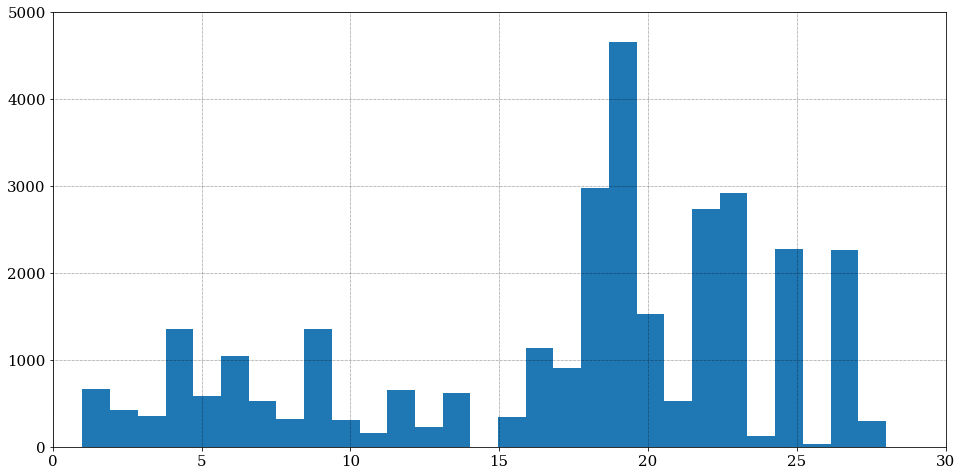

In [23]:
act_mess_df['dist'][(act_mess_df['fl']==0) & (act_mess_df['dist'].notnull())].hist(bins=29);

In [24]:
act_mess_df['date'] = pd.to_datetime(act_mess_df['date'])


In [25]:
hourly_df = act_mess_df[['date','dist','username']][(act_mess_df['fl']==0) & (act_mess_df['dist'] == 1)].copy()
hourly_df['date'] = pd.to_datetime(hourly_df['date'])
hourly_df = hourly_df.set_index('date')
hourly_df = hourly_df.resample('H').count()
hourly_df['1'] = hourly_df['username']
hourly_df = hourly_df.drop(['dist','username'],axis=1)
for i in range(2,29):
    tmp = act_mess_df[['date','username']][(act_mess_df['fl']==0) & (act_mess_df['dist'] == i)].copy()
    tmp = tmp.set_index('date')
    tmp = tmp.resample('H').count()
    hourly_df[str(i)] = tmp['username']

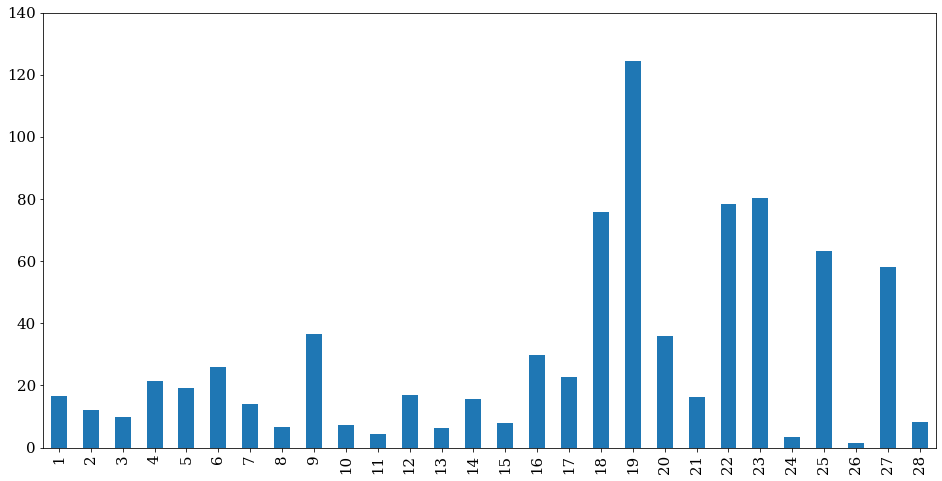

In [34]:
hourly_df.fillna(0)
hourly_df = hourly_df.resample('D').sum()
hourly_df[hourly_df.index.dayofweek < 5].mean().plot.bar();
# hourly_df[hourly_df.index.dayofweek >= 5].mean().plot.bar()
plt.savefig('../img/avg_pax_per_weekday.png')

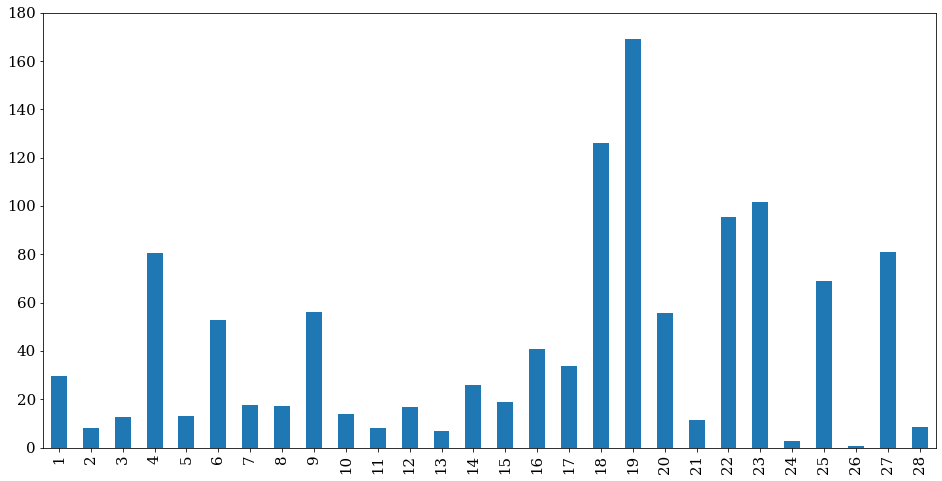

In [35]:
hourly_df[hourly_df.index.dayofweek >= 5].mean().plot.bar();
plt.savefig('../img/avg_pax_per_weekend.png')

In [28]:
d19 = act_mess_df[['date','dist','username']][(act_mess_df['fl']==0) & (act_mess_df['dist'] == 19)].copy()
d19['date'] = pd.to_datetime(d19['date'])
d19 = d19.set_index('date').resample('H').count()
d19['DoW'] = d19.index.dayofweek

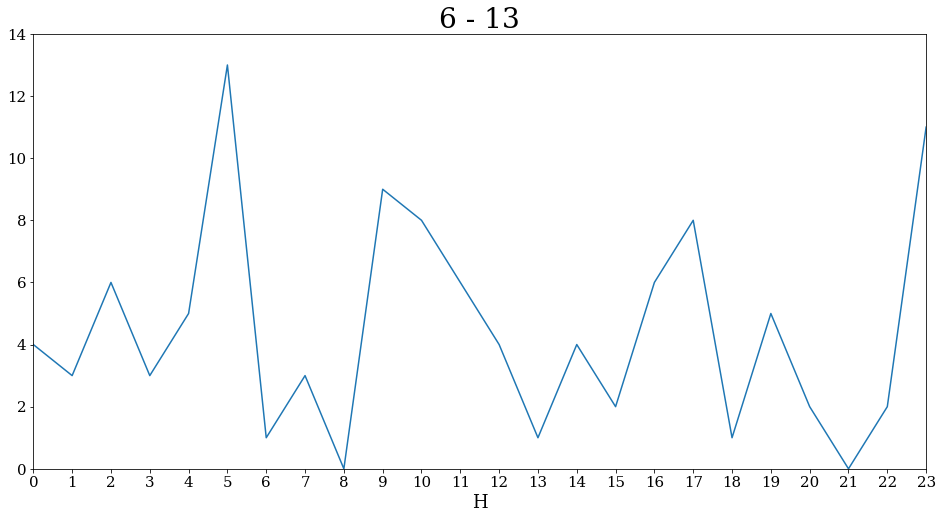

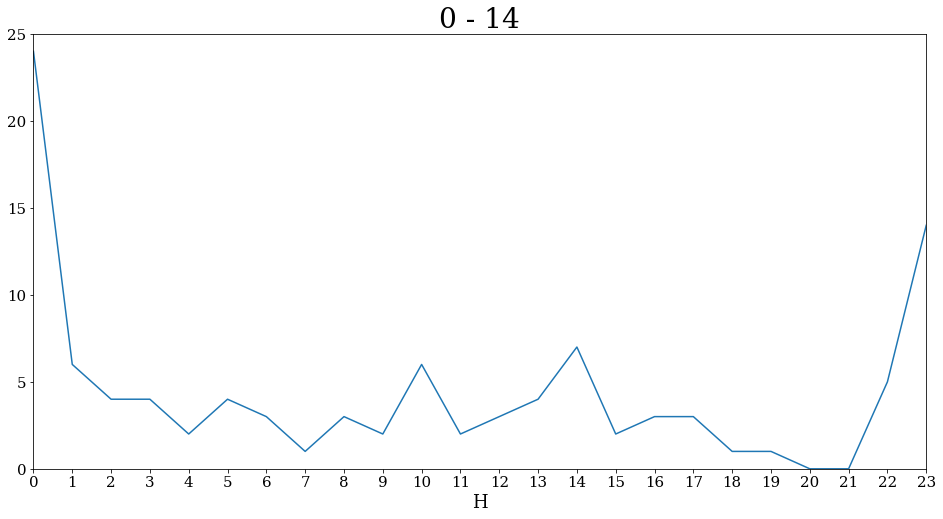

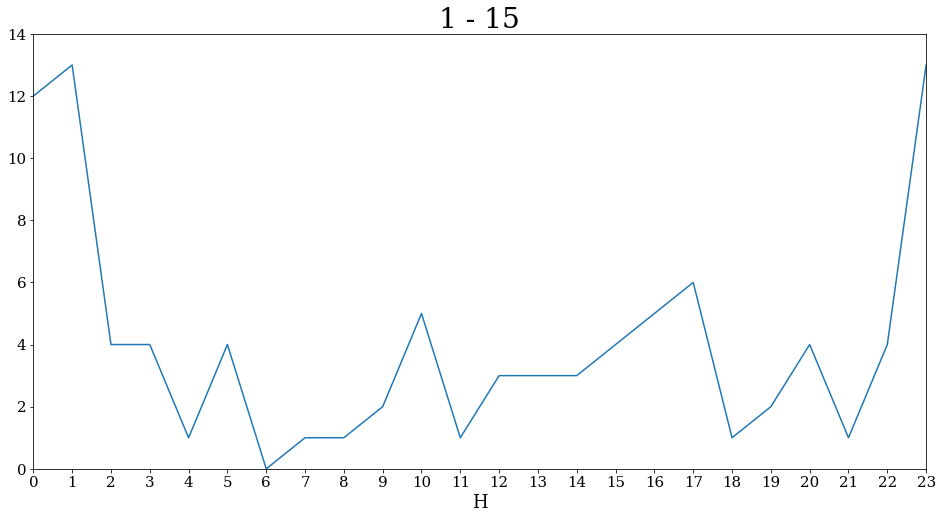

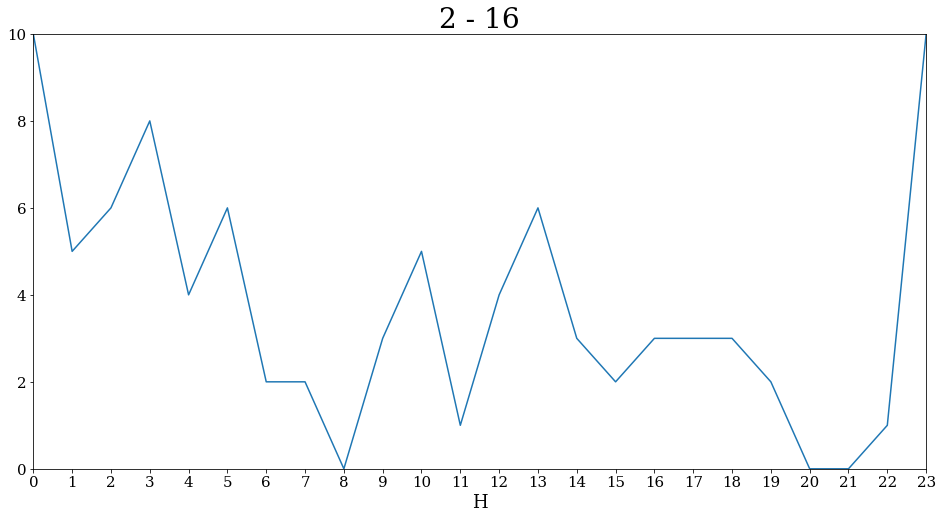

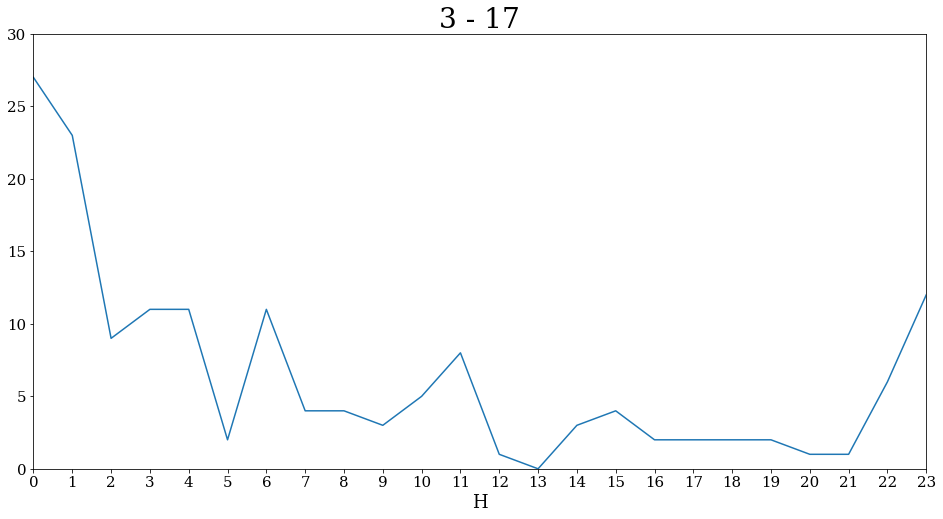

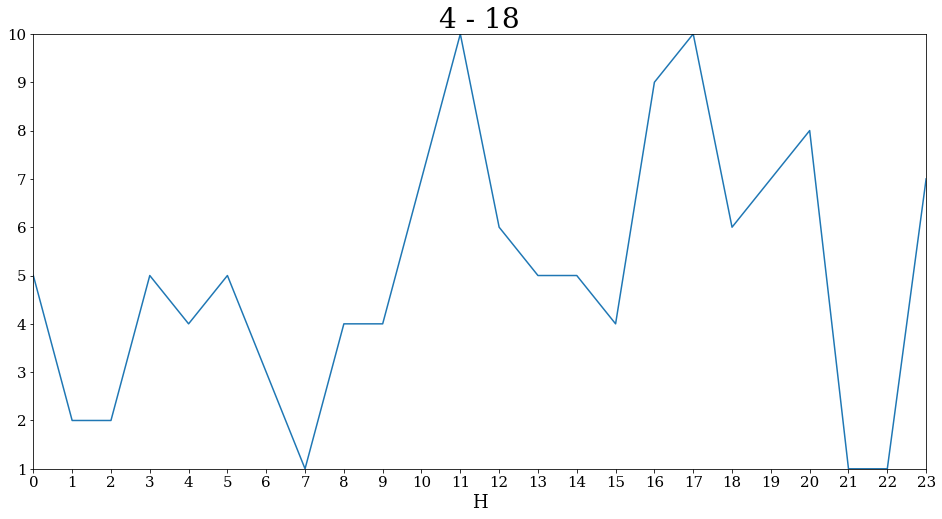

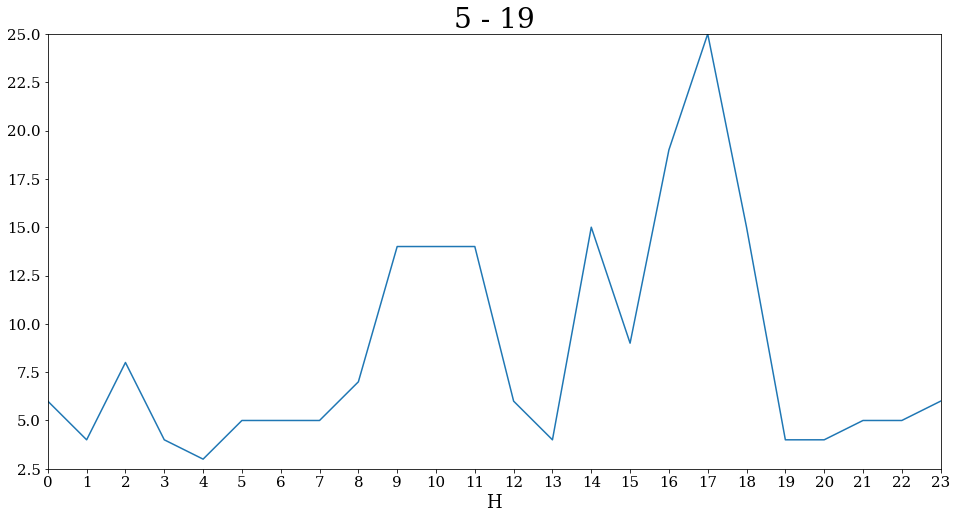

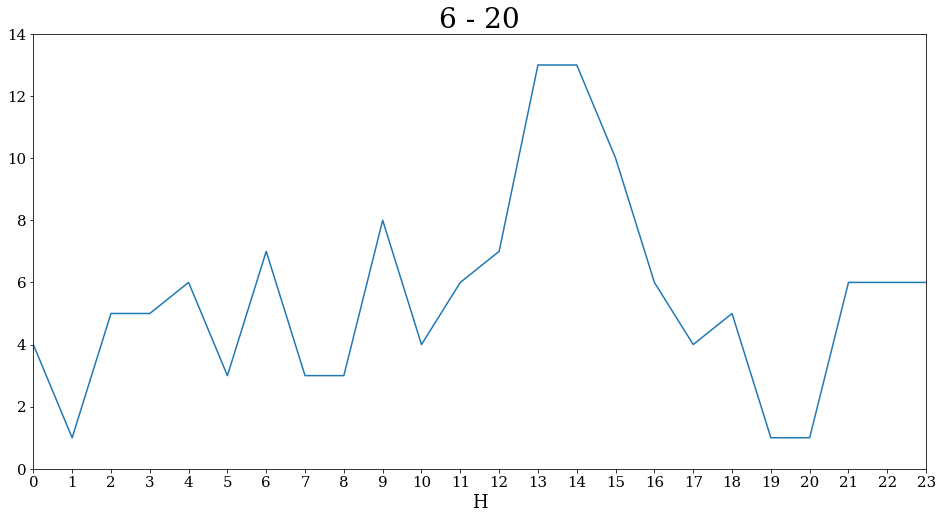

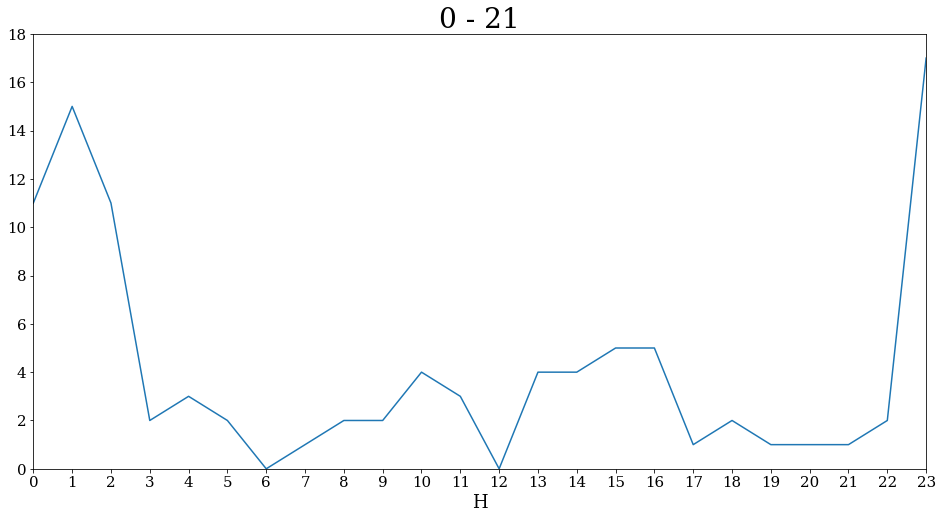

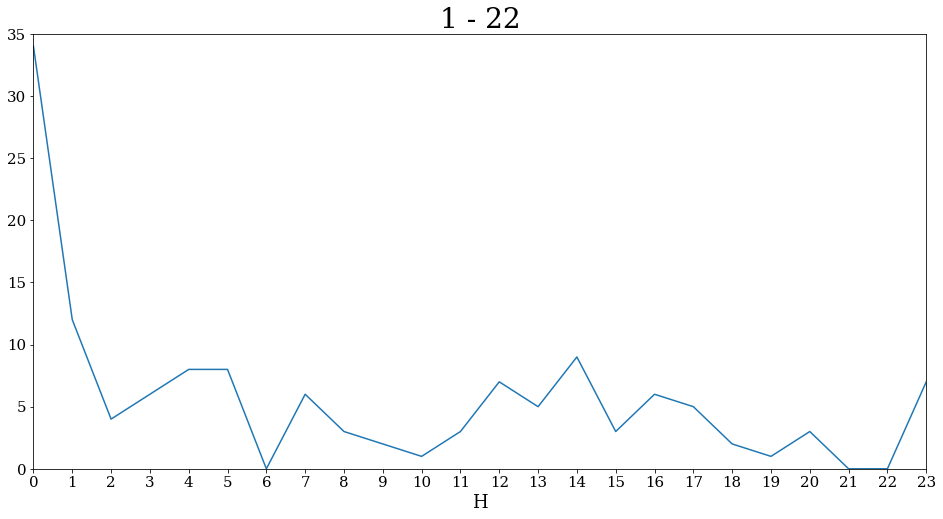

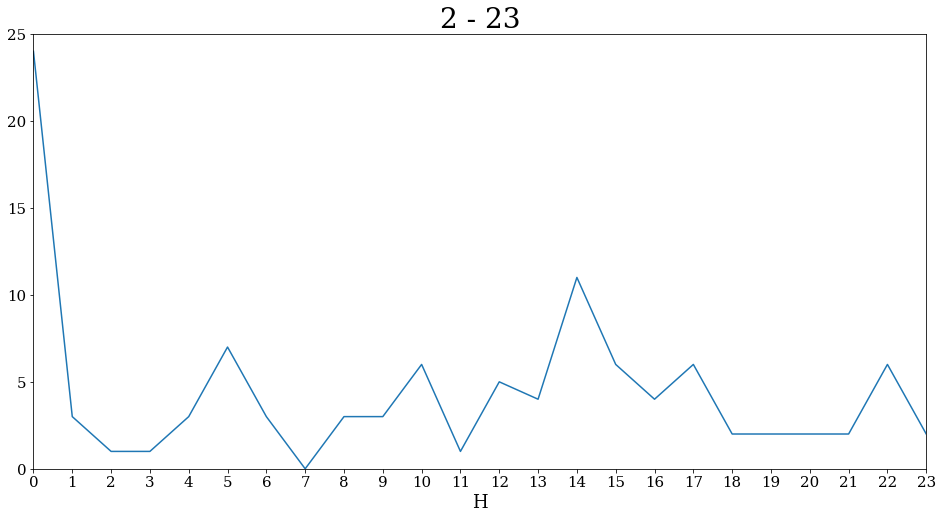

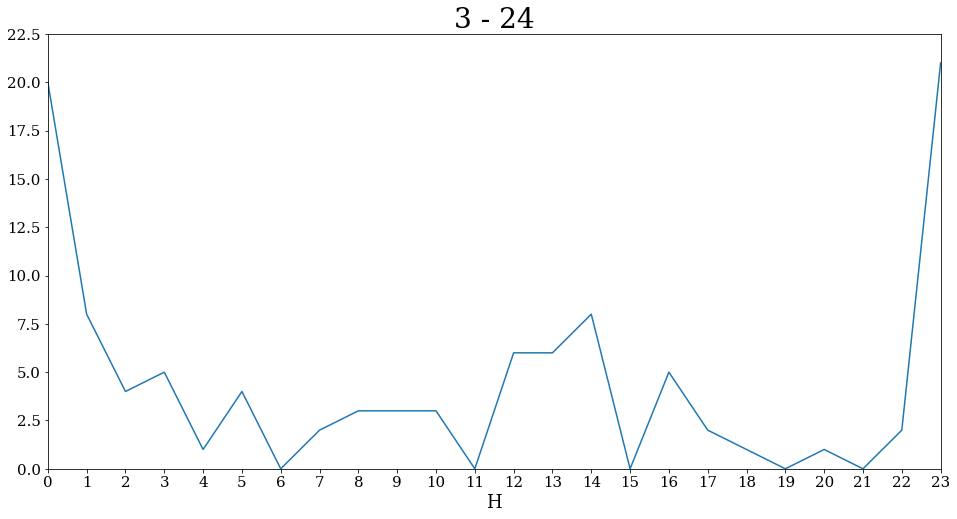

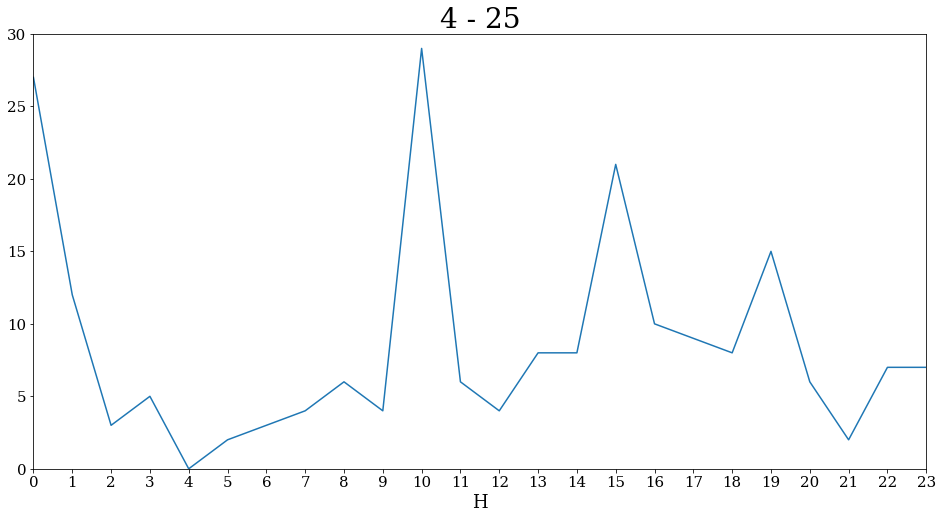

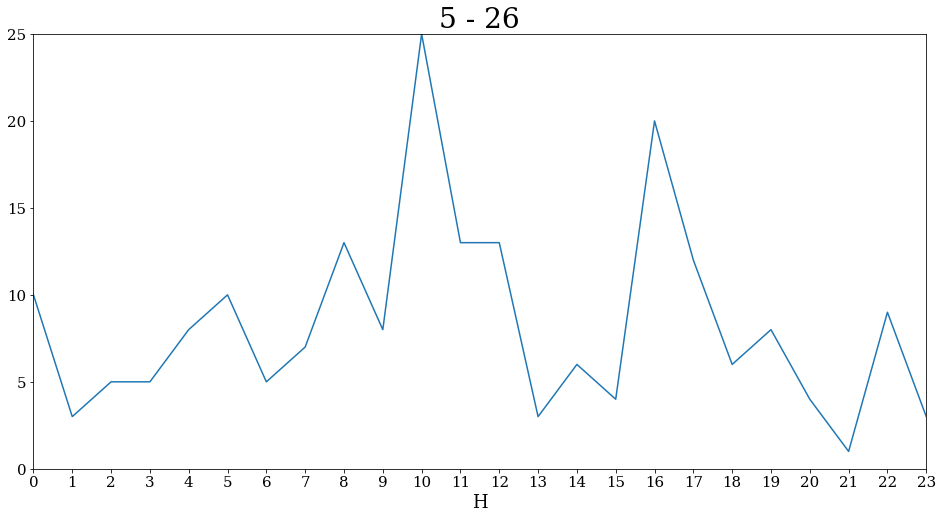

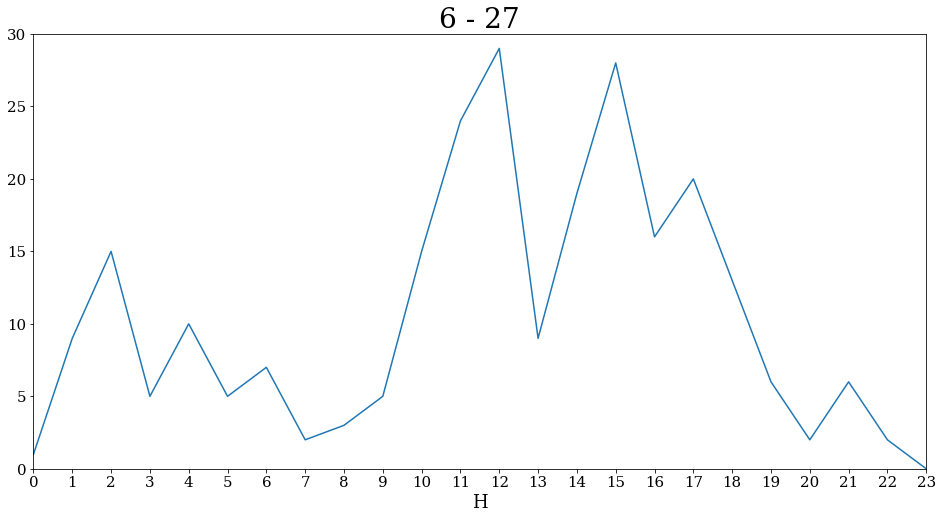

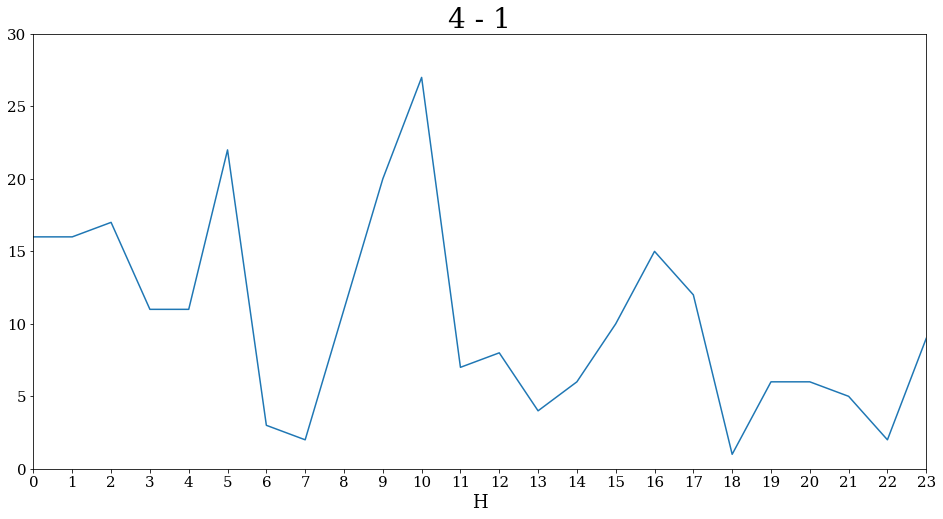

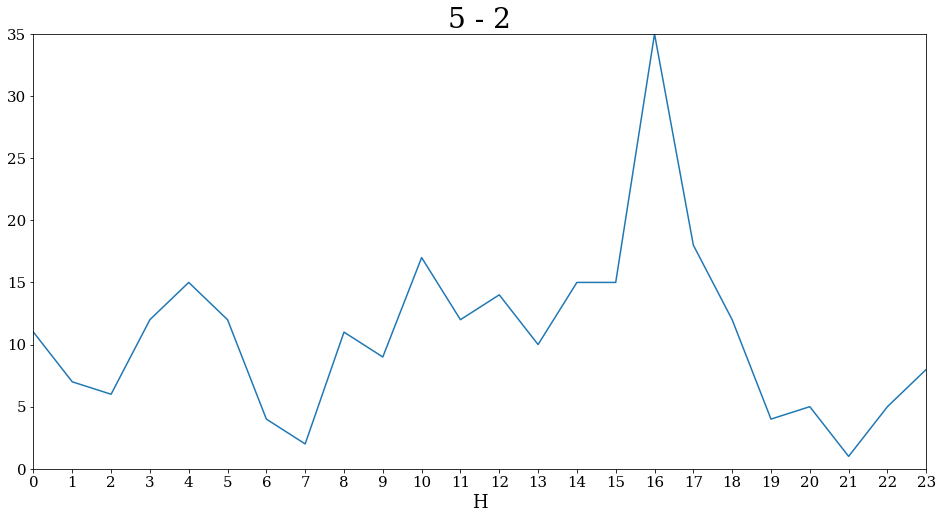

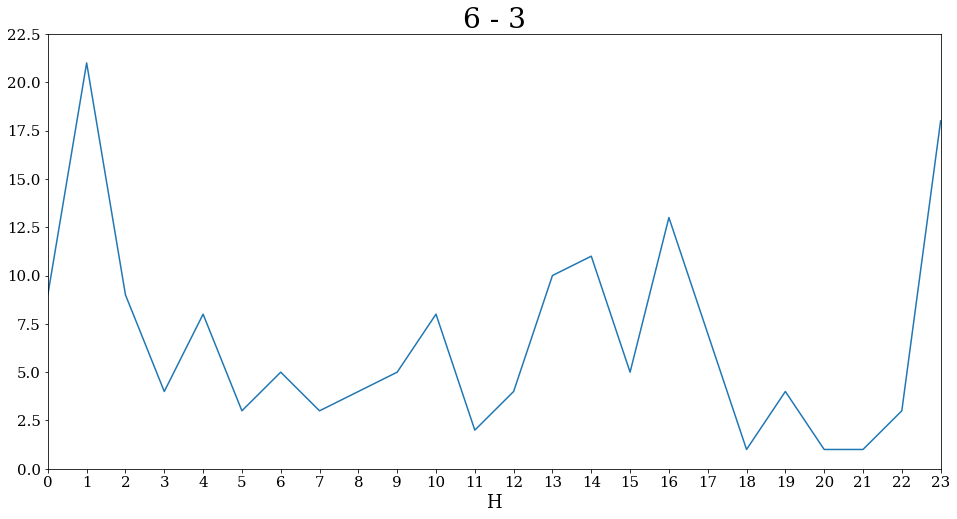

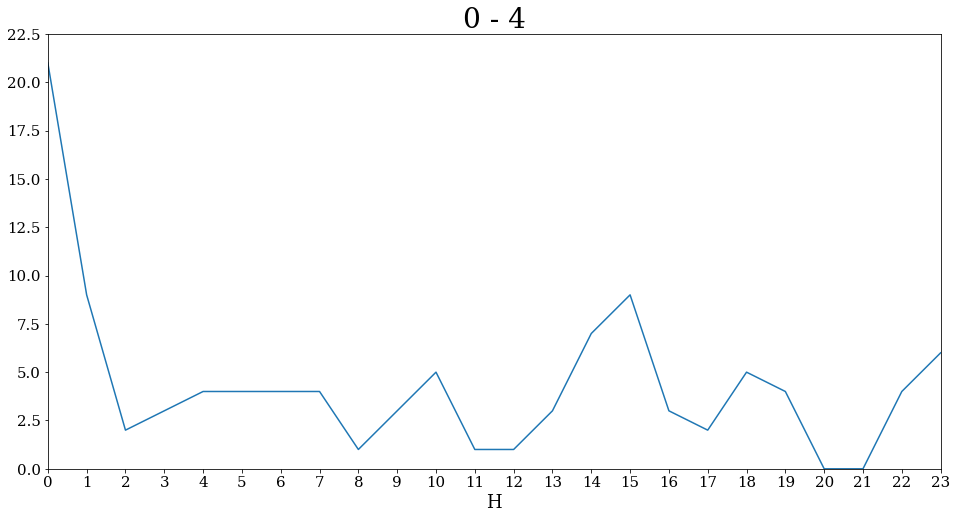

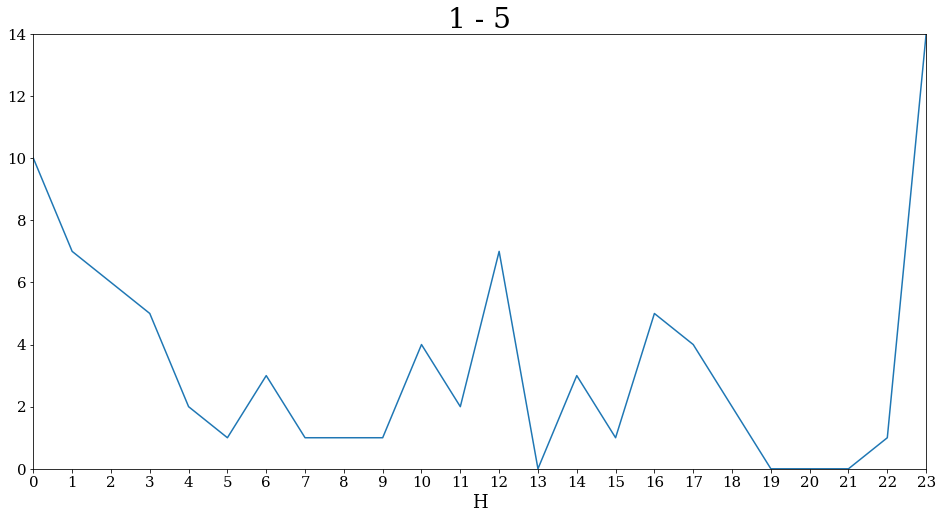

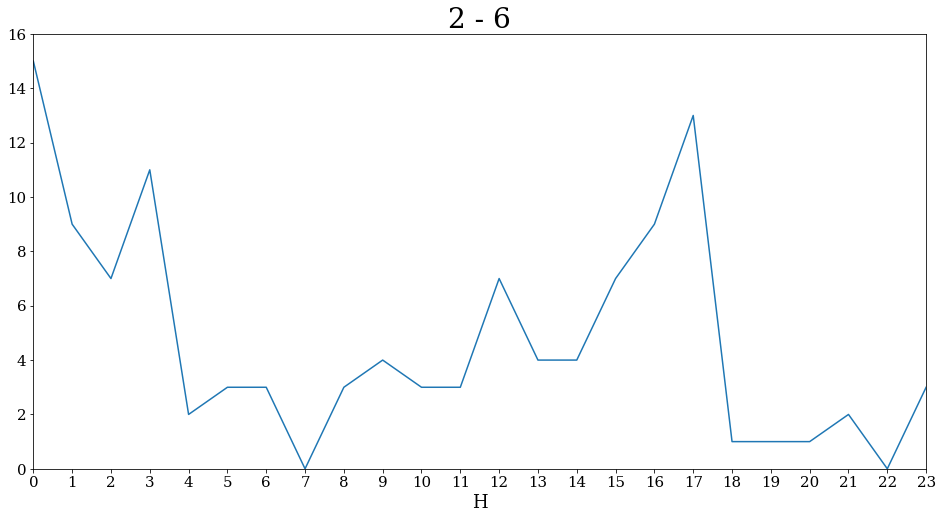

In [30]:
d19['H'] = d19.index.hour
for i in range(13,28):
    start = f'2019-10-{i} 00:00:00'
    end = f'2019-10-{i} 23:00:00'
    temp = d19[start:end]
    temp.set_index('H')['username'].plot()
    plt.title(str(temp.index.dayofweek[0])+" - "+str(temp.index.day[0]))
    plt.xticks(range(24))
    plt.show();
for i in range(1,7):
    start = f'2019-11-{i} 00:00:00'
    end = f'2019-11-{i} 23:00:00'
    temp = d19[start:end]
    temp.set_index('H')['username'].plot()
    plt.title(str(temp.index.dayofweek[0])+" - "+str(temp.index.day[0]))
    plt.xticks(range(24))
    plt.show();

In [31]:
temp

,dist,username,DoW,H
date,,,,
2019-11-06 00:00:00+00:00,21,15,2,0
2019-11-06 01:00:00+00:00,11,9,2,1
2019-11-06 02:00:00+00:00,8,7,2,2
2019-11-06 03:00:00+00:00,12,11,2,3
2019-11-06 04:00:00+00:00,4,2,2,4
2019-11-06 05:00:00+00:00,4,3,2,5
2019-11-06 06:00:00+00:00,4,3,2,6
2019-11-06 07:00:00+00:00,5,0,2,7
2019-11-06 08:00:00+00:00,3,3,2,8


In [32]:
# d19.set_index('H')['username'].plot()

In [39]:
hourly = act_mess_df[['date','dist','username']][(act_mess_df['fl']==0) & (act_mess_df['dist'] == 1)].copy()
hourly['date'] = pd.to_datetime(hourly['date'])
hourly = hourly.set_index('date')
hourly = hourly.resample('H').count()
hourly['1'] = hourly['username']
hourly = hourly.drop(['dist','username'],axis=1)
for i in range(2,29):
    tmp = act_mess_df[['date','username']][(act_mess_df['fl']==0) & (act_mess_df['dist'] == i)].copy()
    tmp = tmp.set_index('date')
    tmp = tmp.resample('H').count()
    hourly[str(i)] = tmp['username']

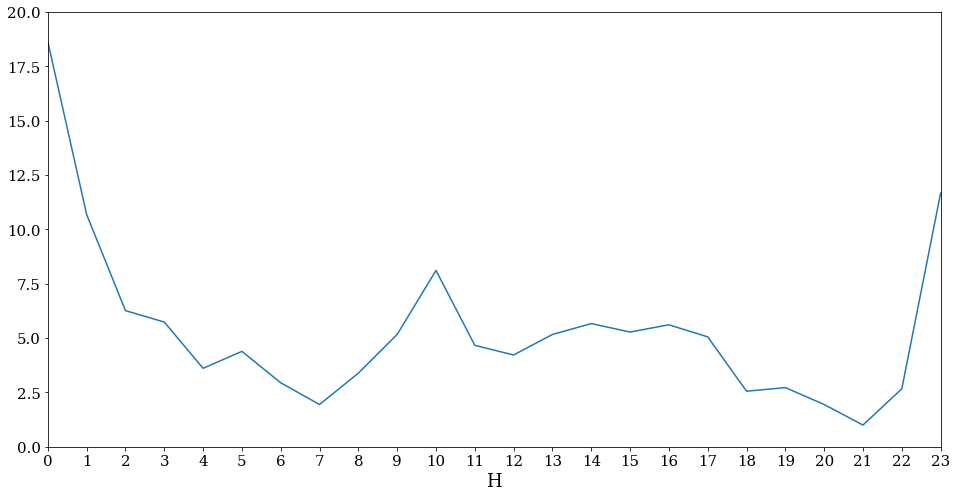

In [53]:
hourly.fillna(0)
hourly['H'] = hourly.index.hour
hourly = hourly.fillna(0)
hourly[hourly.index.dayofweek < 5].set_index('H')['19'].groupby('H').mean().plot()
plt.xticks(range(24));